In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [3]:
df = pd.read_excel(r"D:\project\MultipleDiseasePrediction\kidney_disease.xlsx")
df


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
duplicate = df.duplicated().sum()

print(df.isnull().sum())


id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [5]:
# drop columns
df.drop(columns=['wc', 'rc', 'rbc', 'sod', 'pot','pcv','bgr','bu','su','id'], inplace=True)

# fill with KNN
from sklearn.impute import KNNImputer
cols = ['sc','hemo']
df[cols] = KNNImputer(n_neighbors=5).fit_transform(df[cols])

#mean
df['age'] = df['age'].fillna(df['age'].mean()).astype(int)


#mode
df['al'] = df['al'].fillna(df['al'].mode()[0]).astype(int)
df['bp'] = df['bp'].fillna(df['bp'].mode()[0]).astype(int)
for col in ['ane', 'pe', 'appet', 'cad', 'dm', 'htn','ba','pcc','sg','pc']:
    df[col].fillna(df[col].mode()[0], inplace=True)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15240\1514489345.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Check out layer

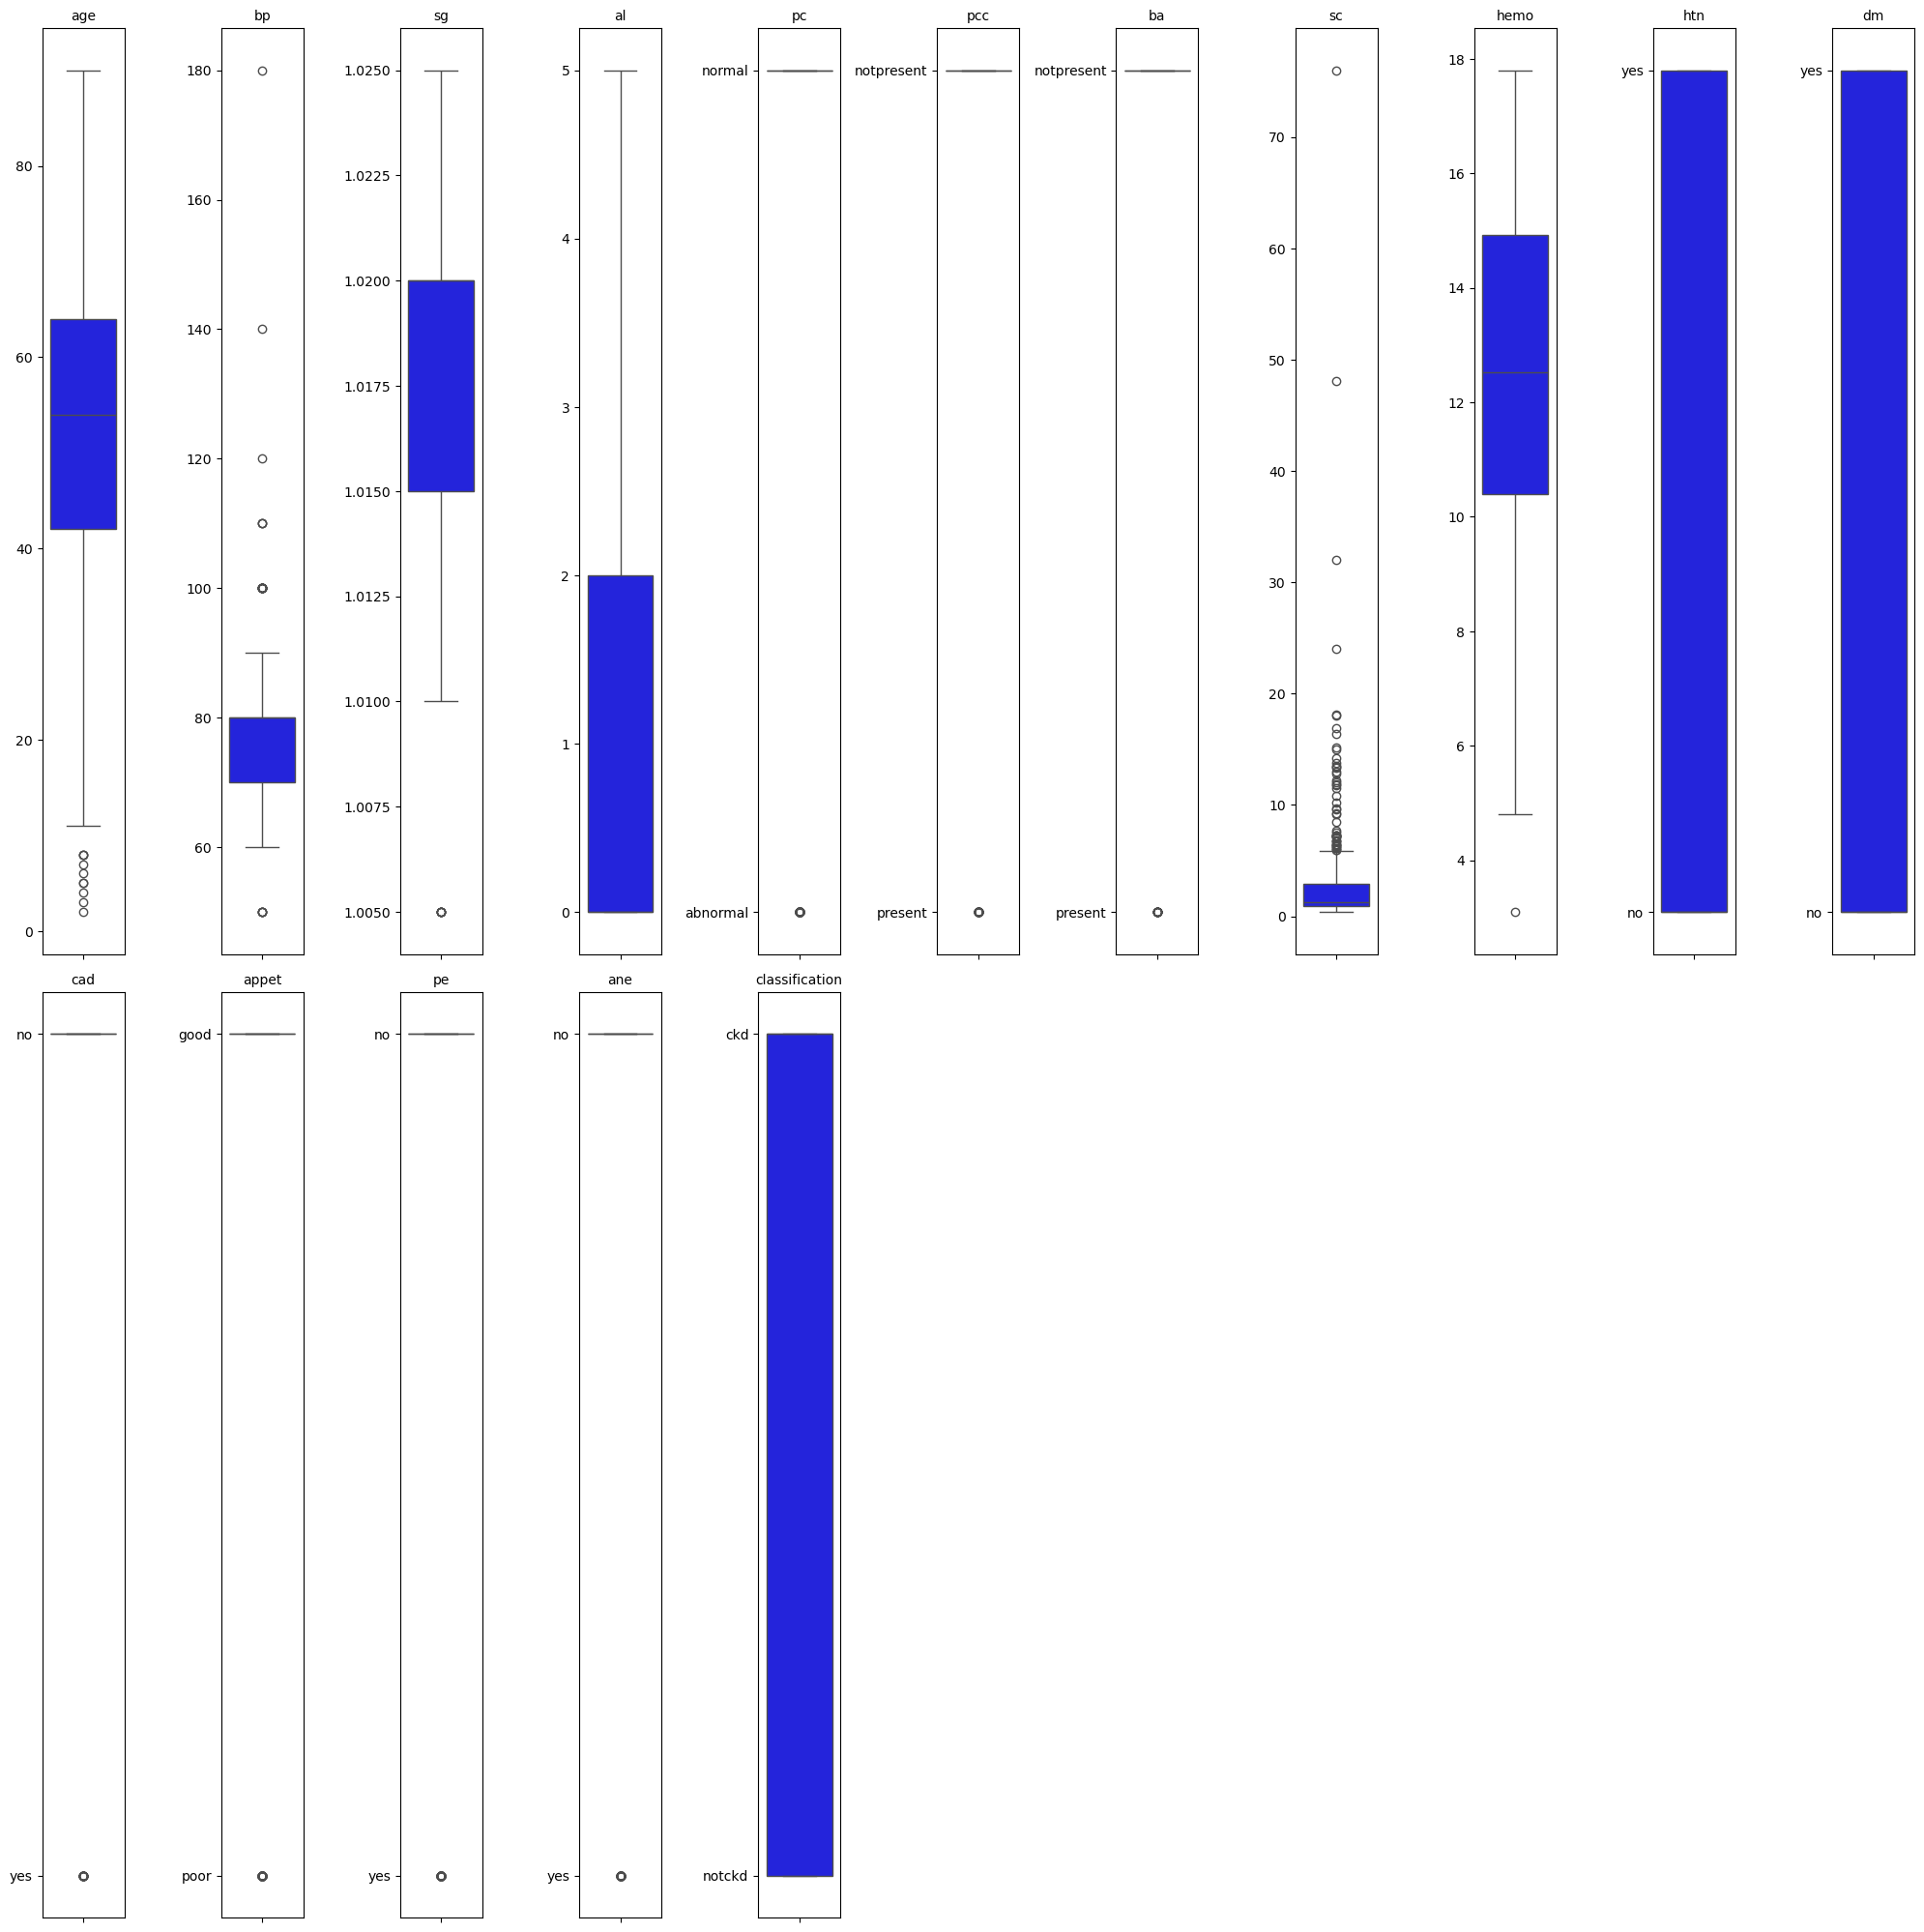

In [6]:
features = df.columns

plt.figure(figsize=(20, 30))  # Increased height
rows = 3
cols = 11  # Adjust according to number of features
for i in range(len(features)):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(y=df[features[i]], color='#0606f9')
    plt.title(features[i], fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [7]:
# Function to detect outliers in each numeric column and report columns with outliers
def detect_outliers(df):
    outliers = {}
    columns_with_outliers = []  # List to store columns with outliers
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    for column in numeric_df.columns:
        # Calculate Q1, Q3, and IQR for the column
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outlier_values = numeric_df[column][(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)]
        
        # If outliers are found, add column to the outliers dictionary and columns_with_outliers list
        if not outlier_values.empty:
            outliers[column] = outlier_values
            columns_with_outliers.append(column)
    
    return outliers, columns_with_outliers

# Detect outliers in the dataset
outliers, columns_with_outliers = detect_outliers(df)

# Print the results
for column, outlier_values in outliers.items():
    print(f"Outliers in {column}: {outlier_values.values}")

# Print columns with outliers
if columns_with_outliers:
    print(f"Columns with outliers: {', '.join(columns_with_outliers)}")
else:
    print("No columns with outliers detected.")


Outliers in age: [7 5 5 8 4 8 3 8 6 2]
Outliers in bp: [ 50 100 100 100 100 100 100 100 100 100 110 100 100 140 180 100 100  50
 100 100 100  50  50 110 100 100 100 120 100 100  50 100 100 100 100 110]
Outliers in sg: [1.005 1.005 1.005 1.005 1.005 1.005 1.005]
Outliers in sc: [24.   7.2  9.6 76.   7.7  7.3 10.8  6.3  9.7  7.3  6.4 32.   6.1  6.7
  6.7  8.5 15.   6.5 10.2 11.5  6.1 12.2  9.2 13.8 16.9  6.   7.1 18.
 13.  48.1 14.2 16.4  7.3  7.5  6.5  6.  18.1 11.8  9.3  7.3  6.8 13.5
 12.8 11.9  7.2 12.  13.4  6.3 15.2 13.3]
Outliers in hemo: [3.1]
Columns with outliers: age, bp, sg, sc, hemo


In [8]:
# remove 1 outlayer value
Q1, Q3 = df['sc'].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers = df[(df['sc'] < Q1 - 1.5*IQR) | (df['sc'] > Q3 + 1.5*IQR)]
df = df.drop(outliers['sc'].sub(df['sc'].median()).abs().idxmax()) if not outliers.empty else df


capping

In [9]:
# List of columns where outliers need to be capped
columns_with_outliers = ['age', 'bp', 'sg', 'sc', 'hemo']

# Function to cap outliers using IQR method without using clip()
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap values manually
    df.loc[df[col] < lower_limit, col] = lower_limit
    df.loc[df[col] > upper_limit, col] = upper_limit

# Apply the outlier capping function to all specified columns
for col in columns_with_outliers:
    cap_outliers(df, col)


skew

In [10]:
# Step 1: Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Calculate skewness
skew_values = df[numerical_cols].skew().sort_values(ascending=False)

# Step 3: Print skewness for all numerical columns
print("Skewness of numerical columns:\n")   
print(skew_values)

# Step 4: Print only columns with high skewness
skew_threshold = 0.5
highly_skewed = skew_values[abs(skew_values) > skew_threshold]

print("\nHighly skewed columns (|skew| > 0.5):\n")
print(highly_skewed)



Skewness of numerical columns:

sc      1.184042
sg     -0.258178
hemo   -0.306374
dtype: float64

Highly skewed columns (|skew| > 0.5):

sc    1.184042
dtype: float64


In [11]:
# df['al'] = np.cbrt(df['al'])

In [12]:
from sklearn.preprocessing import PowerTransformer

# List of columns to transform
cols_to_transform = ['sc']

# Initialize PowerTransformer with Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the selected columns
df[cols_to_transform] = pt.fit_transform(df[cols_to_transform])


Univariate Analysis for Numerical Columns

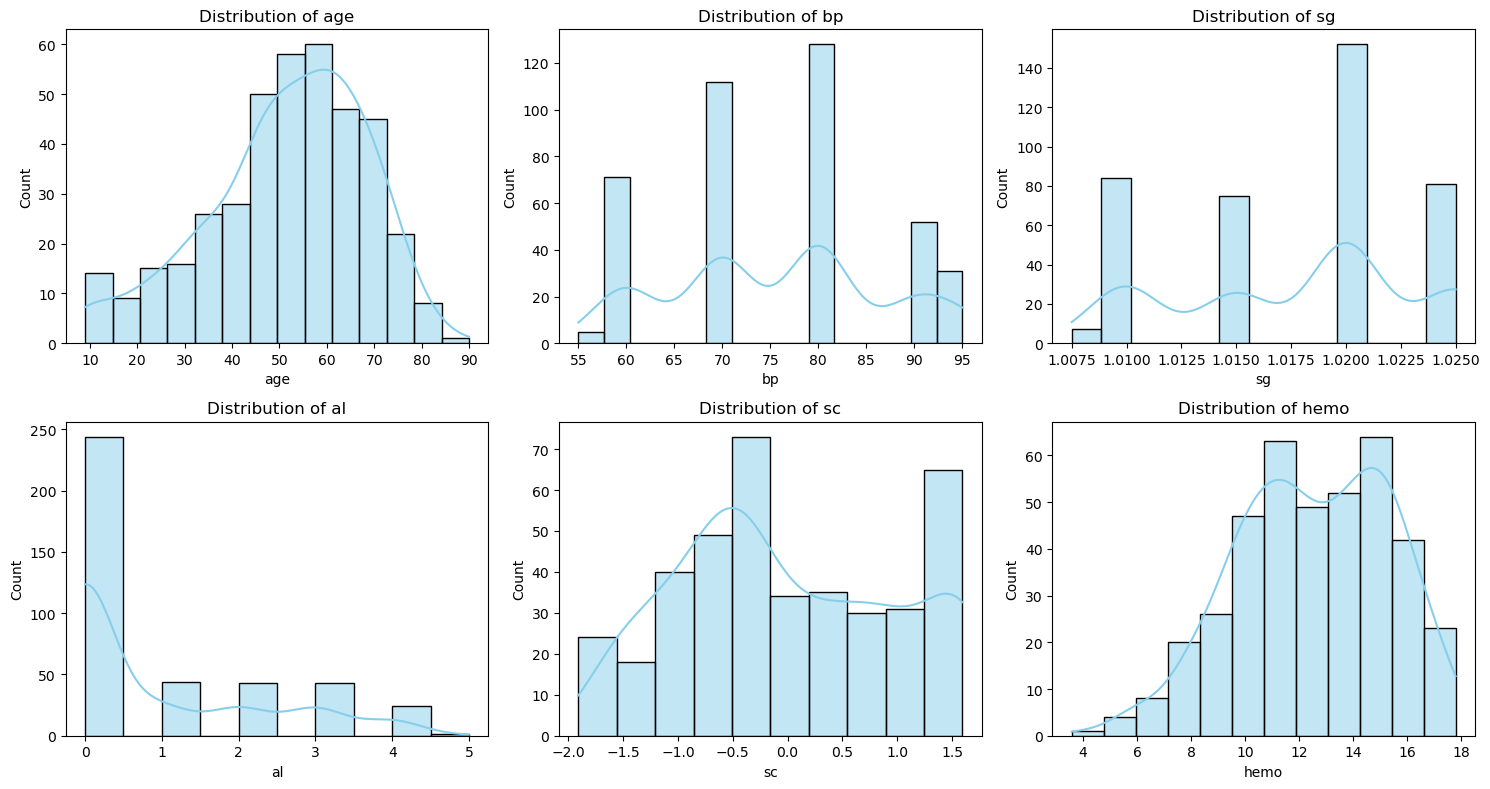

In [13]:
numerical_cols = ['age', 'bp', 'sg', 'al', 'sc', 'hemo']


cols_per_row = 3
rows = -(-len(numerical_cols) // cols_per_row)

plt.figure(figsize=(cols_per_row * 5, rows * 4)) 

for idx, col in enumerate(numerical_cols):
    plt.subplot(rows, cols_per_row, idx + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


Univariate Analysis for Categorical Columns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15240\2237691089.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='icefire')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15240\2237691089.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='icefire')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15240\2237691089.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='icefire')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15240\2237691089.py:10: FutureWarning: 

Passi

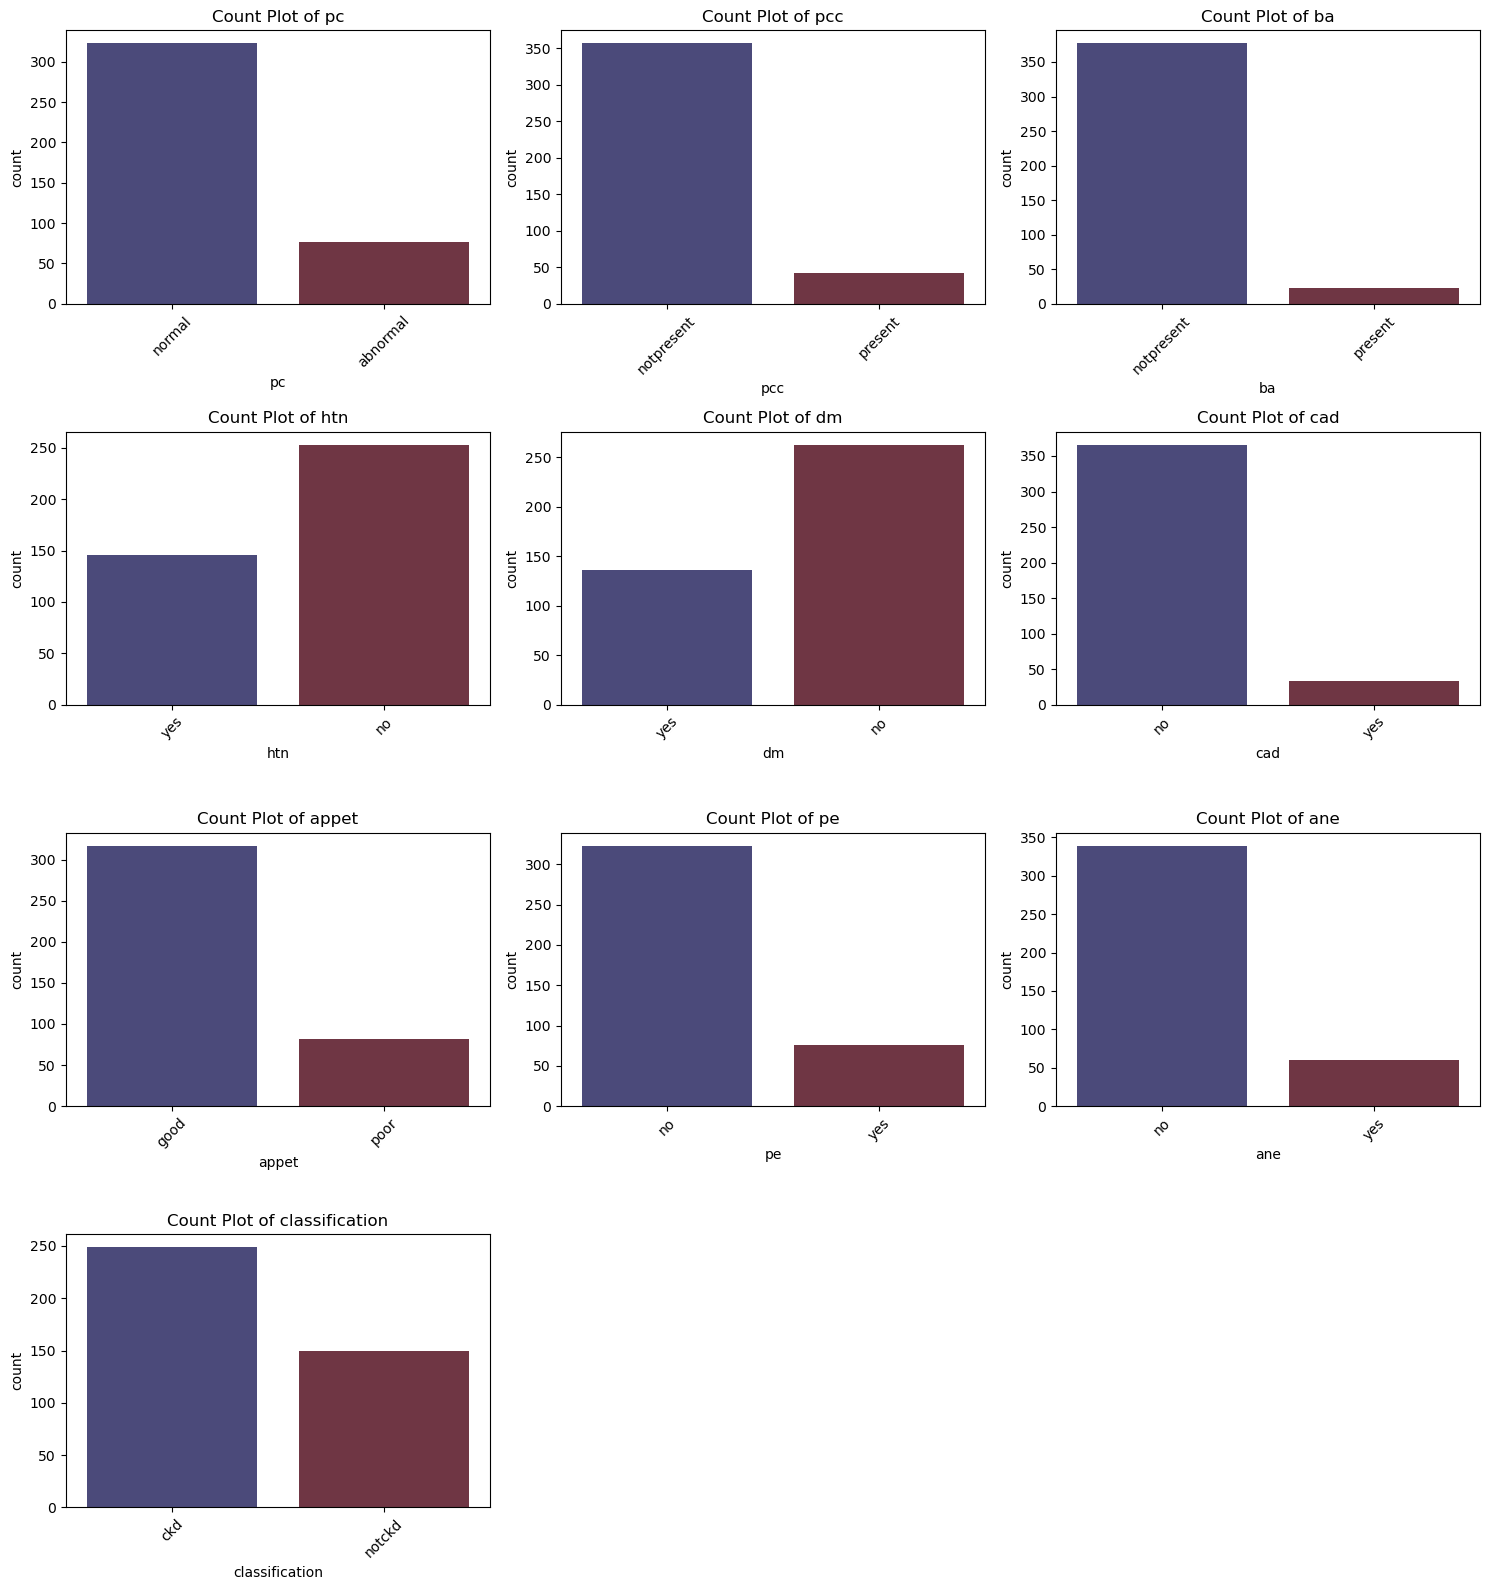

In [14]:
categorical_cols = ['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

cols_per_row = 3
rows = -(-len(categorical_cols) // cols_per_row)

plt.figure(figsize=(cols_per_row * 5, rows * 4))

for idx, col in enumerate(categorical_cols):
    plt.subplot(rows, cols_per_row, idx + 1)
    sns.countplot(x=col, data=df, palette='icefire')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


Bivariate Analysis for Numerical vs Target

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15240\806736530.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y=col, data=df, palette='pastel')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15240\806736530.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y=col, data=df, palette='pastel')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15240\806736530.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y=col, data=df, palette='pastel')
C:\Users\Lenovo\AppData\Local\Temp\ipykerne

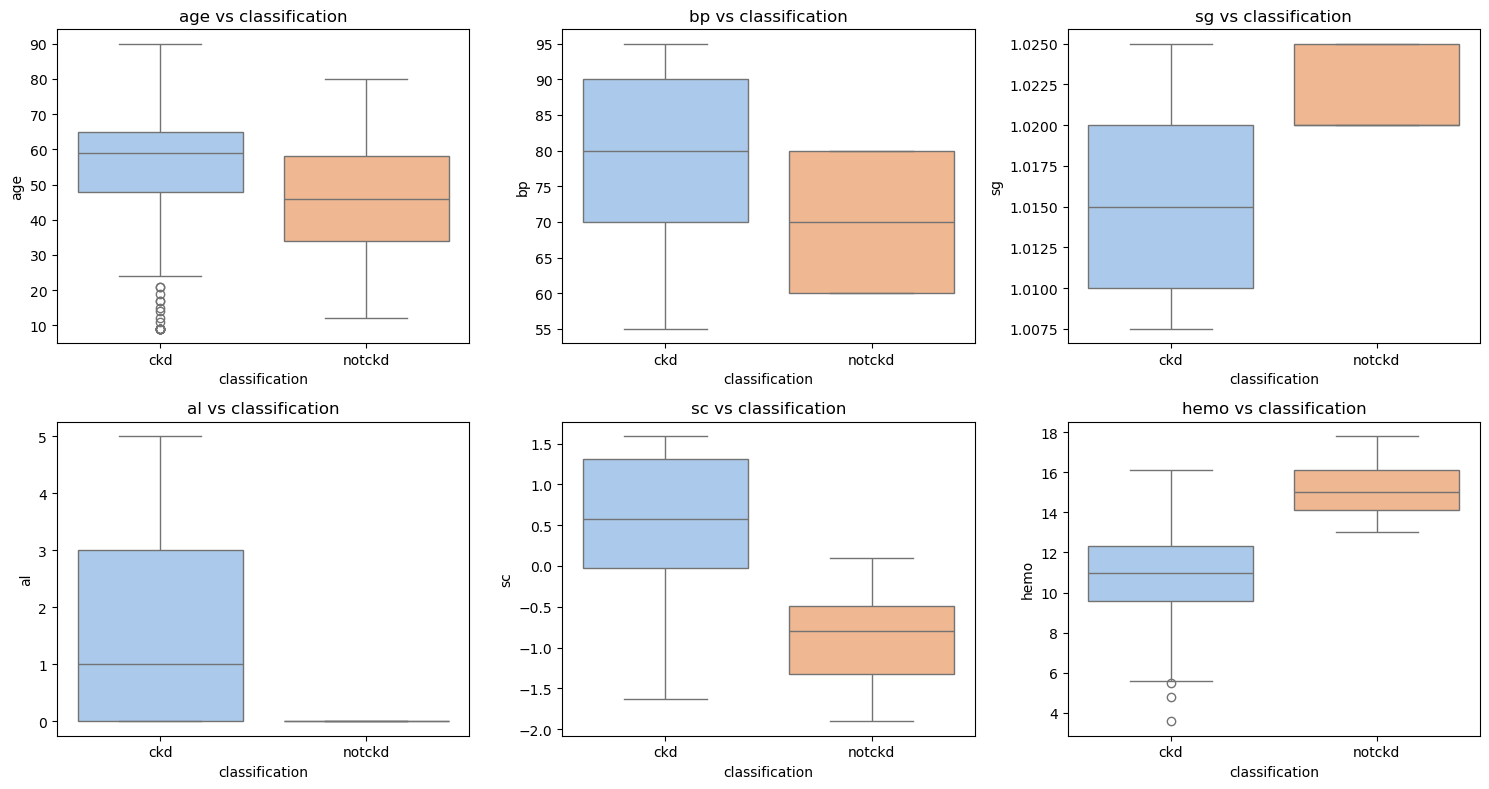

In [15]:
numerical_cols = ['age', 'bp', 'sg', 'al','sc', 'hemo']

# Define layout
cols_per_row = 3
rows = -(-len(numerical_cols) // cols_per_row) 

plt.figure(figsize=(cols_per_row * 5, rows * 4))

for idx, col in enumerate(numerical_cols):
    plt.subplot(rows, cols_per_row, idx + 1)
    sns.boxplot(x='classification', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs classification')
    plt.tight_layout()

plt.show()


Bivariate Analysis Categorical Numerical vs Target

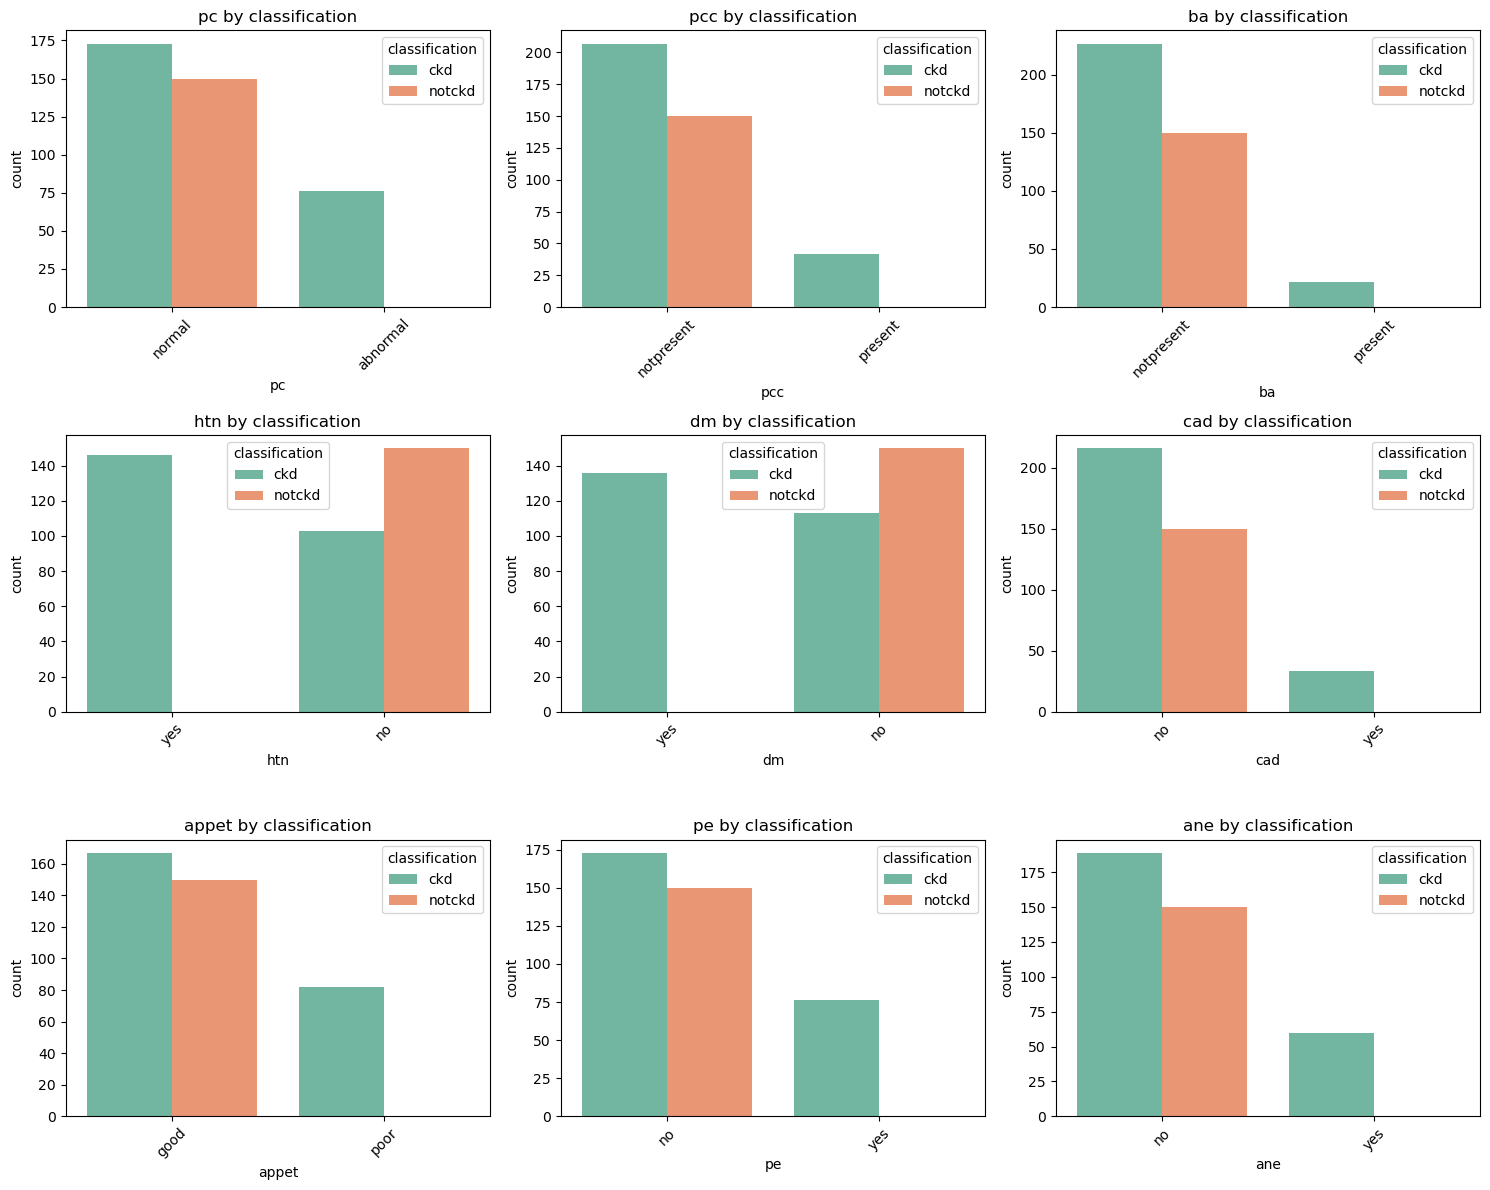

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Define layout
cols_per_row = 3
rows = -(-len(categorical_cols[:-1]) // cols_per_row)  # Exclude 'classification' for plots

plt.figure(figsize=(cols_per_row * 5, rows * 4))  # Adjust size as needed

# Loop through all categorical columns excluding the target ('classification')
for idx, col in enumerate(categorical_cols[:-1]):  # Exclude last column
    plt.subplot(rows, cols_per_row, idx + 1)
    sns.countplot(x=col, hue='classification', data=df, palette='Set2')
    plt.title(f'{col} by classification')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


Correlation Analysis

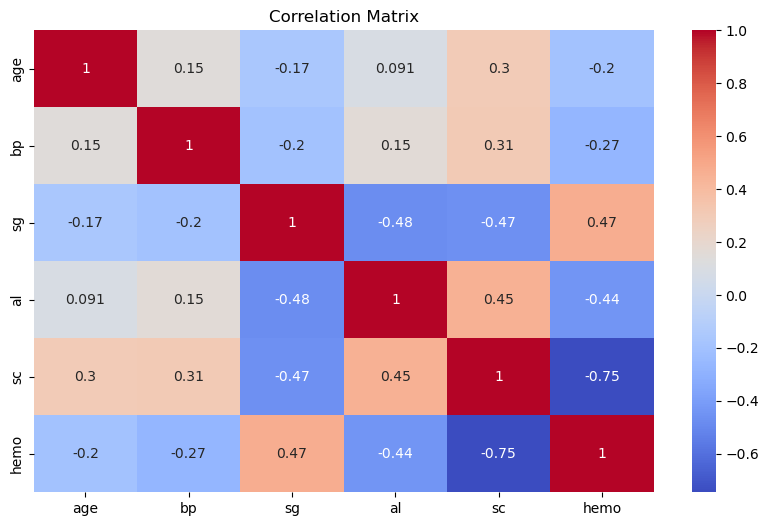

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns

label_encoders = {}
for i in categorical_cols:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
    label_encoders[i] = le 


In [19]:
float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].round(1)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Define Features (X) and Target (y)
X = df[['age', 'bp', 'sg', 'al', 'pc', 'pcc', 'ba', 'sc',
    'hemo', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']]
y = df['classification']

# Step 2: Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Predict
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.975

Confusion Matrix:
 [[50  2]
 [ 0 28]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



Random Forest


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Define Features (X) and Target (y)
X = df[['age', 'bp', 'sg', 'al', 'pc', 'pcc', 'ba', 'sc',
        'hemo', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']]
y = df['classification']

# Step 2: Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and Train Random Forest Classifier
kidney_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
kidney_model.fit(X_train_scaled, y_train)

# Step 5: Predict
y_pred = kidney_model.predict(X_test_scaled)

# Step 6: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9875

Confusion Matrix:
 [[51  1]
 [ 0 28]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Step 1: Define Features (X) and Target (y)
X = df[['age', 'bp', 'sg', 'al', 'pc', 'pcc', 'ba', 'sc',
        'hemo', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']]
y = df['classification']

# Step 2: Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize and Train Random Forest Classifier
kidney_model = RandomForestClassifier(n_estimators=100, random_state=42)
kidney_model.fit(X_train_scaled, y_train_resampled)

# Step 6: Predict
y_pred = kidney_model.predict(X_test_scaled)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9875

Confusion Matrix:
 [[51  1]
 [ 0 28]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [23]:
import pickle

# Save to file
with open('kp.pkl', 'wb') as file:
    pickle.dump(kidney_model, file)

print("Model saved as kidney patient.pkl ✅")

Model saved as kidney patient.pkl ✅


In [28]:
# Load from file
with open('kp.pkl', 'rb') as file:
    kidney_model = pickle.load(file)

# Use it to predict
prediction = kidney_model.predict([[60, 80, 1, 1, 1, 1, 0, -1.6, 14.5, 1, 1, 1, 1, 1, 1]])
print("Predicted parkinsons patient:", prediction)

Predicted parkinsons patient: [0]


In [25]:
# df.to_csv(r'D:\project\MultipleDiseasePrediction\kp.csv',index= False)